In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [192]:
event_df_1 = pd.read_csv('event_df.csv',parse_dates=['start_local_dt','end_local_dt','created_dt','published_dt'],low_memory=False)
event_df_1.head()

,Unnamed: 0,category_id,city,cost_0,cost_1,cost_2,country,created_dt,currency,donation_0,...,tax_75,tax_76,tax_77,tax_78,tax_79,tax_80,tax_81,tax_82,tax_83,tax_84
0,0,111.0,Wauconda,30.0,30.0,30.0,US,2018-06-07 13:32:09+00:00,USD,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,119.0,Elgin,15.0,NaN,NaN,US,2018-07-28 19:47:56+00:00,USD,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,110.0,Olalla,135.0,NaN,NaN,US,2018-06-28 20:37:37+00:00,USD,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,113.0,Waco,20.0,NaN,NaN,US,2018-06-22 11:57:43+00:00,USD,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,105.0,Oakland,18.0,25.0,23.0,US,2018-08-05 23:27:51+00:00,USD,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
event_df_2 = pd.read_csv('event_df_2.csv',parse_dates=['start_local_dt','end_local_dt','created_dt','published_dt'],low_memory=False)
event_df_2.head()

,Unnamed: 0,category_id,city,cost_0,country,created_dt,currency,donation_0,end_local_dt,fee_0,...,tax_90,tax_91,tax_92,tax_93,tax_94,tax_95,tax_96,tax_97,tax_98,tax_99
0,0,101.0,New York City,0.0,US,2018-05-16 03:31:29+00:00,USD,0.0,2018-12-03 14:00:00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,116.0,New York,0.0,US,2018-11-13 14:20:43+00:00,USD,0.0,2018-12-03 19:00:00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,101.0,Phoenix,0.0,US,2017-12-12 22:16:24+00:00,USD,0.0,2018-12-03 13:00:00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,103.0,Tampa,30.0,US,2018-08-09 14:33:31+00:00,USD,0.0,2018-12-04 06:00:00,6.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,115.0,Las Vegas,70.0,US,2018-10-01 19:55:39+00:00,USD,0.0,2018-12-03 17:00:00,5.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
print(event_df_1.shape)
print(event_df_2.shape)

(9121, 710)
(9762, 2182)


In [199]:
event_df = pd.merge(event_df_1,event_df_2,how='outer')
event_df.shape

(18883, 2182)

In [226]:
event_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [227]:
print(event_df.shape)

id_counts = event_df.id.value_counts()
non_unique_counts = list(id_counts.loc[id_counts>1].index)

print(non_unique_counts)

# event_df = event_df.drop(event_df.loc[~event_df[cat].isin(high_cat_counts)].index,axis=0)

# print(event_df.shape)

# print(event_df.shape)


(18883, 2181)
[51616993818, 52237479708, 45912691095, 48557251045, 52183969658, 52724030996, 51347603063, 49859541230, 46165820211, 52879491984, 52928158547, 50371094299, 51225399549, 49758533112, 47820816349, 52498507449, 52118842862, 53076007768, 51840954691, 44489231489, 50878515008, 41500034721, 46135064219, 51516799133, 49669188881, 48041856486, 51539688596, 51730133221, 51121354347, 50871329516, 50909577918, 52462142681, 41257077028, 45560577915, 51798880847, 48169207396, 52736466190, 48915273901, 51302367763, 52969759978, 52421681661, 52104441788, 50644365661, 47362036125, 52198390792, 49866801947, 51655511024, 52181839286, 52436870090, 47992205980, 52524686752, 52070588532, 53035628994]


In [228]:
print(event_df.shape)
event_df = event_df.drop_duplicates()
print(event_df.shape)

(18883, 2181)
(18830, 2181)


In [229]:
event_df.cost_1.notnull().sum()

10543

In [230]:
event_df.loc[event_df.cost_2.notnull(),'cost_2']

0          30.00
4          23.00
5          35.00
8         351.75
13         60.00
          ...   
18830    2340.00
18847      49.95
18852     225.00
18856      35.00
18859       0.00
Name: cost_2, Length: 6501, dtype: float64

In [231]:
event_df.id.tail()

18878    58412007888
18879    55034205791
18880    55448653415
18881    58544568380
18882    52010814747
Name: id, dtype: int64

In [232]:
event_df.loc[event_df.cost_1.notnull() == event_df.cost_2.notnull(),['cost_1','cost_2']]

,cost_1,cost_2
0,30.00,30.00
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,25.00,23.00
5,15.00,35.00
6,NaN,NaN
7,NaN,NaN
8,351.75,351.75
9,NaN,NaN


In [233]:
print(event_df.cost_0.count())
print(event_df.fee_0.notnull().sum())
print(event_df.tax_0.notnull().sum())
print(event_df.free_0.notnull().sum())

18830
18830
18830
18830


In [235]:
event_df.loc[((event_df.cost_0 == 0) & (event_df.cost_1.isnull()))
                      | ((event_df.cost_0 == event_df.cost_1)),
                        ['cost_0','cost_1']].shape


(3804, 2)

Delete the ticket_class expansions beyond index 0

In [240]:
unwanted_list = ['cost_0','fee_0','tax_0','donation_0','free_0','maximum_quantity_0','on_sale_status_0','include_fee_0']
filter_col = [ele for ele in filter_col if ele not in unwanted_list]

In [241]:
event_df.drop(filter_col,axis=1,inplace=True)

KeyError: "['cost_1' 'cost_2' 'donation_1' ... 'tax_97' 'tax_98' 'tax_99'] not found in axis"

In [242]:
event_df.shape

(18830, 37)

In [243]:
event_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18830 entries, 0 to 18882
Data columns (total 37 columns):
category_id                17386 non-null float64
city                       18373 non-null object
cost_0                     18830 non-null float64
country                    18497 non-null object
created_dt                 18830 non-null datetime64[ns, UTC]
currency                   18830 non-null object
donation_0                 18830 non-null float64
end_local_dt               18830 non-null datetime64[ns]
fee_0                      18830 non-null float64
format_id                  17571 non-null float64
free_0                     18830 non-null float64
has_available_tickets      18830 non-null float64
id                         18830 non-null int64
include_fee_0              18830 non-null float64
inventory_type             18830 non-null object
is_paid                    18830 non-null float64
is_reserved_seating        18830 non-null float64
is_series                  1

Refund_retention_policy and maximum_quantity_0 have lots of missing values. We will drop these columns

In [244]:
event_df.drop(['refund_retention_policy','maximum_quantity_0'],axis=1,inplace=True)
event_df.shape

(18830, 35)

In [245]:
null_columns = event_df.columns[event_df.isnull().any()]
event_df[null_columns].isnull().sum()

category_id       1444
city               457
country            333
format_id         1259
postal_code        644
region             619
subcategory_id    6226
venue_id           186
dtype: int64

147 events have no venue expansion and 102 events that had no venue_id. Many of them were online events, so we will identify those and give a venue_id of -999 and change all the address data to 'online'. Those without expansions but with venue ids will be dropped because we will have no idea where they are.

In [246]:
print(event_df.loc[event_df.city.isnull() 
             & event_df.country.isnull() 
             & event_df.postal_code.isnull() 
             & event_df.region.isnull() 
             & event_df.venue_id.isnull(),'venue_id'].shape)

print(event_df.loc[event_df.city.isnull() 
             & event_df.country.isnull() 
             & event_df.postal_code.isnull() 
             & event_df.region.isnull(),'venue_id'].shape)

(186,)
(294,)


In [247]:
event_df.loc[event_df.city.isnull() 
             & event_df.country.isnull() 
             & event_df.postal_code.isnull() 
             & event_df.region.isnull() 
             & event_df.venue_id.isnull(),'venue_id'] = -999
event_df.loc[event_df.venue_id == -999,['city','country','postal_code','region']] = 'online'

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


There are 147 events without any venue location information. 102 of them are NaN so we can put them into one bin (perhaps online).

In [248]:
null_columns = event_df.columns[event_df.isnull().any()]
event_df[null_columns].isnull().sum()

category_id       1444
city               271
country            147
format_id         1259
postal_code        458
region             433
subcategory_id    6226
dtype: int64

Anything else that is missing in the venue expansion let's just fully drop for now. This amounts to 388 deleted rows. NBD

In [249]:
print(event_df.shape)
print(event_df.loc[event_df.city.isnull() 
             | event_df.country.isnull() 
             | event_df.postal_code.isnull() 
             | event_df.region.isnull() 
             | event_df.venue_id.isnull(),'venue_id'].shape)
event_df = event_df.drop(event_df.loc[event_df.city.isnull() 
             | event_df.country.isnull() 
             | event_df.postal_code.isnull() 
             | event_df.region.isnull() 
             | event_df.venue_id.isnull(),'venue_id'].index,axis=0)
print(event_df.shape)

(18830, 35)
(737,)
(18093, 35)


In [250]:
null_columns = event_df.columns[event_df.isnull().any()]
event_df[null_columns].isnull().sum()

category_id       1343
format_id         1188
subcategory_id    5887
dtype: int64

In [251]:
event_df.loc[event_df.category_id.isnull() & event_df.subcategory_id.isnull()].shape

(1343, 35)

If organizers did not put a category id in, then they also did not put in a sub category id

In [252]:
event_df.loc[event_df.category_id.isnull() & event_df.format_id.isnull()].shape

(859, 35)

For now, let's keep all the null category, subcategory, and format ids, and set them to their own value: -999

In [253]:
event_df.loc[event_df.category_id.isnull(), ['category_id']] = -999
event_df.loc[event_df.subcategory_id.isnull(), ['subcategory_id']] = -999
event_df.loc[event_df.format_id.isnull(), ['format_id']] = -999

In [254]:
null_columns = event_df.columns[event_df.isnull().any()]
event_df[null_columns].isnull().sum()

Series([], dtype: float64)

No more null values!!

In [255]:
event_df.city.value_counts()>100

New York          True
Los Angeles       True
San Francisco     True
Chicago           True
Washington        True
                 ...  
Eagar            False
Mission Woods    False
Emporia          False
Catonsville      False
Biloxi           False
Name: city, Length: 2784, dtype: bool

In [256]:
categorical_series = event_df.category_id.value_counts()
categorical_series[categorical_series>50].index

Float64Index([ 103.0,  101.0,  110.0, -999.0,  111.0,  105.0,  113.0,  107.0,
               199.0,  108.0,  104.0,  102.0,  115.0,  116.0,  114.0,  106.0,
               112.0,  119.0,  117.0,  118.0,  109.0,  120.0],
             dtype='float64')

In [257]:
event_df.category_id.value_counts()

 103.0    2796
 101.0    2526
 110.0    1785
-999.0    1343
 111.0    1271
 105.0    1214
 113.0     867
 107.0     841
 199.0     830
 108.0     605
 104.0     588
 102.0     570
 115.0     556
 116.0     505
 114.0     411
 106.0     358
 112.0     346
 119.0     334
 117.0     117
 118.0      97
 109.0      74
 120.0      59
Name: category_id, dtype: int64

In [258]:
categorical_series = event_df.groupby('category_id').count()
categorical_series

,city,cost_0,country,created_dt,currency,donation_0,end_local_dt,fee_0,format_id,free_0,...,published_dt,refund_policy,region,shareable,start_local_dt,start_tz,subcategory_id,tax_0,venue_id,waitlist_available
category_id,,,,,,,,,,,,,,,,,,,,,
-999.0,1343,1343,1343,1343,1343,1343,1343,1343,1343,1343,...,1343,1343,1343,1343,1343,1343,1343,1343,1343,1343
101.0,2526,2526,2526,2526,2526,2526,2526,2526,2526,2526,...,2526,2526,2526,2526,2526,2526,2526,2526,2526,2526
102.0,570,570,570,570,570,570,570,570,570,570,...,570,570,570,570,570,570,570,570,570,570
103.0,2796,2796,2796,2796,2796,2796,2796,2796,2796,2796,...,2796,2796,2796,2796,2796,2796,2796,2796,2796,2796
104.0,588,588,588,588,588,588,588,588,588,588,...,588,588,588,588,588,588,588,588,588,588
105.0,1214,1214,1214,1214,1214,1214,1214,1214,1214,1214,...,1214,1214,1214,1214,1214,1214,1214,1214,1214,1214
106.0,358,358,358,358,358,358,358,358,358,358,...,358,358,358,358,358,358,358,358,358,358
107.0,841,841,841,841,841,841,841,841,841,841,...,841,841,841,841,841,841,841,841,841,841
108.0,605,605,605,605,605,605,605,605,605,605,...,605,605,605,605,605,605,605,605,605,605


Get rid of any categorical data that has less than 20 items in it.

In [259]:
event_df = event_df.drop(['city','postal_code','is_series','is_series_parent','listed'],axis=1)

In [260]:
categorical_cols = ['category_id', 'country', 'currency',
       'donation_0', 'format_id', 'free_0',
       'has_available_tickets', 'include_fee_0', 'inventory_type',
       'is_paid', 'is_reserved_seating',
       'is_sold_out', 'locale', 'on_sale_status_0', 'online_event',
       'refund_policy', 'region', 'shareable',
       'start_tz', 'subcategory_id',
       'waitlist_available']

In [261]:
print(event_df.shape)
for cat in categorical_cols:
#     print(event_df.shape)
    cat_counts = event_df[cat].value_counts()
#     print(cat_counts)
    high_cat_counts = list(cat_counts[cat_counts>20].index)
#     print(high_cat_counts)
    print(cat)
    event_df = event_df.drop(event_df.loc[~event_df[cat].isin(high_cat_counts)].index,axis=0)
    print(event_df.shape)
print(event_df.shape)


(18093, 30)
category_id
(18093, 30)
country
(17903, 30)
currency
(17899, 30)
donation_0
(17899, 30)
format_id
(17899, 30)
free_0
(17899, 30)
has_available_tickets
(17899, 30)
include_fee_0
(17899, 30)
inventory_type
(17899, 30)
is_paid
(17899, 30)
is_reserved_seating
(17899, 30)
is_sold_out
(17899, 30)
locale
(17894, 30)
on_sale_status_0
(17893, 30)
online_event
(17893, 30)
refund_policy
(17893, 30)
region
(17377, 30)
shareable
(17377, 30)
start_tz
(17332, 30)
subcategory_id
(16711, 30)
waitlist_available
(16711, 30)
(16711, 30)


In [262]:
event_df.subcategory_id.value_counts()

-999.0      5624
 3006.0      458
 10003.0     457
 3008.0      445
 1010.0      391
 1001.0      387
 11999.0     381
 5010.0      361
 10001.0     320
 1999.0      255
 15001.0     250
 10002.0     250
 14001.0     244
 16006.0     242
 4007.0      191
 1005.0      189
 2004.0      188
 10004.0     174
 7003.0      174
 13999.0     165
 11008.0     164
 1007.0      160
 7001.0      148
 13003.0     137
 3999.0      125
 15005.0     121
 6003.0      117
 6001.0      116
 3017.0      116
 10999.0     113
 3015.0      112
 5001.0      112
 11003.0     112
 4002.0      110
 13007.0     103
 5012.0      102
 3003.0       99
 5004.0       97
 3002.0       96
 2999.0       94
 1002.0       92
 7999.0       91
 3004.0       90
 7005.0       88
 3014.0       86
 11004.0      86
 8007.0       82
 3013.0       80
 5008.0       79
 7002.0       77
 11002.0      71
 3010.0       71
 1003.0       69
 13010.0      68
 8001.0       67
 19008.0      66
 1006.0       66
 5002.0       65
 19999.0      

In [265]:
event_df.shape

(16711, 30)

Calculate time between event creation and publication, publication and start, start and end.

First, make sure timezones are taken away. I'll have to look into this further!!

In [266]:
event_df.start_local_dt = event_df.start_local_dt.dt.tz_localize(None)
event_df.end_local_dt = event_df.end_local_dt.dt.tz_localize(None)
event_df.published_dt = event_df.published_dt.dt.tz_localize(None)
event_df.created_dt = event_df.created_dt.dt.tz_localize(None)

In [267]:
event_df.created_dt

0       2018-06-07 13:32:09
1       2018-07-28 19:47:56
2       2018-06-28 20:37:37
3       2018-06-22 11:57:43
4       2018-08-05 23:27:51
                ...        
18877   2019-01-21 19:05:59
18879   2019-01-17 18:01:10
18880   2019-01-26 17:38:09
18881   2019-03-11 00:45:31
18882   2018-10-30 15:22:44
Name: created_dt, Length: 16711, dtype: datetime64[ns]

In [268]:
print(event_df.shape)
event_df['created_to_publish'] = (event_df.published_dt - event_df.created_dt).astype('timedelta64[m]')
event_df['publish_to_start'] = (event_df.start_local_dt - event_df.published_dt).astype('timedelta64[m]')
event_df['start_to_end'] = (event_df.end_local_dt - event_df.start_local_dt).astype('timedelta64[m]')
print(event_df.shape)

(16711, 30)
(16711, 33)


{'whiskers': [<matplotlib.lines.Line2D at 0x1a44a1cfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a72e792b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a44a1c780>],
 'medians': [<matplotlib.lines.Line2D at 0x1a72e79ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a72e79cf8>],
 'means': []}

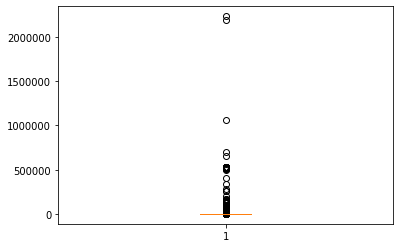

In [269]:
plt.boxplot(event_df['start_to_end'])

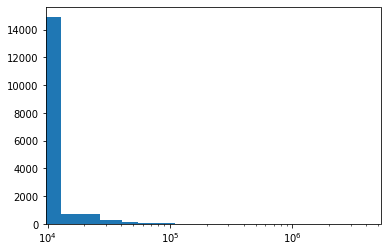

In [270]:
plt.hist(event_df.created_to_publish,bins=300)
plt.xscale('log')

In [271]:
times = event_df.created_dt.dt.hour

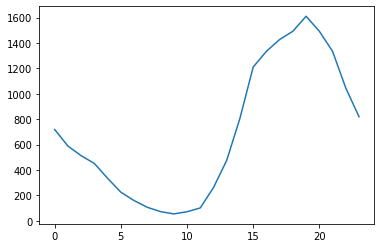

In [272]:
plt.plot(times.value_counts().sort_index())

In [273]:
event_df.columns

Index(['category_id', 'cost_0', 'country', 'created_dt', 'currency',
       'donation_0', 'end_local_dt', 'fee_0', 'format_id', 'free_0',
       'has_available_tickets', 'id', 'include_fee_0', 'inventory_type',
       'is_paid', 'is_reserved_seating', 'is_sold_out', 'locale',
       'on_sale_status_0', 'online_event', 'published_dt', 'refund_policy',
       'region', 'shareable', 'start_local_dt', 'start_tz', 'subcategory_id',
       'tax_0', 'venue_id', 'waitlist_available', 'created_to_publish',
       'publish_to_start', 'start_to_end'],
      dtype='object')

In [274]:
from sklearn.preprocessing import OneHotEncoder

"""Make a copy of the dataframe which will be our final transformation
before building a model."""
train = event_df.copy()

# Create instance of OHE
ohe_enc = OneHotEncoder(sparse=False,categories='auto')

# Features to OHE
feature_list = categorical_cols

# Fit the one hot encoder
cat_features_ohe = ohe_enc.fit_transform(train[feature_list])

# One hot encode each feature
k=0
for feature in range(len(ohe_enc.categories_)):
    
    for cat in ohe_enc.categories_[feature]:
    
        """Do not create new OHE column for last category of each feature
        It will be redundant information and is not needed."""
        if cat != ohe_enc.categories_[feature][-1]:
            train['_'.join((feature_list[feature],str(cat)))] = cat_features_ohe[:,k]
            
        k+=1

# Drop old feature columns
train.drop(labels=feature_list,axis=1,inplace=True)

# Check the head of the dataframe
train.head()

,cost_0,created_dt,end_local_dt,fee_0,id,published_dt,start_local_dt,tax_0,venue_id,created_to_publish,...,subcategory_id_16006.0,subcategory_id_16009.0,subcategory_id_16999.0,subcategory_id_17003.0,subcategory_id_18001.0,subcategory_id_19002.0,subcategory_id_19003.0,subcategory_id_19006.0,subcategory_id_19008.0,waitlist_available_0.0
0,30.0,2018-06-07 13:32:09,2018-09-03 17:00:00,3.72,46844131057,2018-06-07 13:43:31,2018-09-03 09:00:00,0.0,25149064.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,15.0,2018-07-28 19:47:56,2018-09-01 12:00:00,0.00,48522658578,2018-07-28 19:49:52,2018-09-01 11:00:00,0.0,20307481.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,135.0,2018-06-28 20:37:37,2018-09-01 21:00:00,0.00,47569506675,2018-06-28 20:37:40,2018-09-01 18:00:00,0.0,24881752.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,20.0,2018-06-22 11:57:43,2018-09-01 12:00:00,1.19,47349009161,2018-06-22 11:58:27,2018-09-01 09:30:00,0.0,22394135.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,18.0,2018-08-05 23:27:51,2018-09-01 23:00:00,0.00,48782412509,2018-08-05 23:28:57,2018-09-01 21:30:00,0.0,22687889.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [275]:
train.describe()

,cost_0,fee_0,id,tax_0,venue_id,created_to_publish,publish_to_start,start_to_end,category_id_-999.0,category_id_101.0,...,subcategory_id_16006.0,subcategory_id_16009.0,subcategory_id_16999.0,subcategory_id_17003.0,subcategory_id_18001.0,subcategory_id_19002.0,subcategory_id_19003.0,subcategory_id_19006.0,subcategory_id_19008.0,waitlist_available_0.0
count,16711.000000,16711.000000,1.671100e+04,16711.000000,1.671100e+04,1.671100e+04,1.671100e+04,1.671100e+04,16711.000000,16711.000000,...,16711.000000,16711.000000,16711.000000,16711.000000,16711.000000,16711.000000,16711.000000,16711.000000,16711.000000,16711.000000
mean,136.494843,3.662507,5.074141e+10,0.308584,2.484808e+07,1.169179e+04,9.851981e+04,2.287508e+03,0.077494,0.141823,...,0.014481,0.001975,0.002394,0.003650,0.003231,0.001616,0.001915,0.001616,0.003949,0.916821
std,1566.813676,25.370627,3.879480e+09,6.062069,5.551018e+06,1.117756e+05,1.050386e+05,3.501186e+04,0.267381,0.348879,...,0.119468,0.044396,0.048868,0.060309,0.056755,0.040165,0.043719,0.040165,0.062723,0.276160
min,0.000000,0.000000,1.418538e+09,0.000000,-9.990000e+02,-2.371870e+05,-1.138500e+05,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,4.896761e+10,0.000000,2.330093e+07,0.000000e+00,3.923100e+04,1.500000e+02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,25.000000,2.090000,5.120622e+10,0.000000,2.664664e+07,1.000000e+01,6.723300e+04,2.100000e+02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,3.615000,5.321064e+10,0.000000,2.847746e+07,1.434500e+03,1.176210e+05,3.600000e+02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,100000.000000,1525.700000,7.129514e+10,639.100000,3.869983e+07,3.930021e+06,3.102964e+06,2.233620e+06,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [276]:
pd.options.display.max_rows = 500
train.mean()

cost_0                                   1.364948e+02
fee_0                                    3.662507e+00
id                                       5.074141e+10
tax_0                                    3.085842e-01
venue_id                                 2.484808e+07
created_to_publish                       1.169179e+04
publish_to_start                         9.851981e+04
start_to_end                             2.287508e+03
category_id_-999.0                       7.749387e-02
category_id_101.0                        1.418228e-01
category_id_102.0                        2.932200e-02
category_id_103.0                        1.609718e-01
category_id_104.0                        3.357070e-02
category_id_105.0                        6.756029e-02
category_id_106.0                        1.944827e-02
category_id_107.0                        4.781282e-02
category_id_108.0                        2.674885e-02
category_id_109.0                        1.376339e-03
category_id_110.0           

In [277]:
train.shape

(16711, 261)

In [278]:
train.to_csv('./event_df_cleaned.csv',index_label='index')